In [1]:
import numpy as np
from basicpy import BaSiC
from scipy.ndimage import zoom
import zarr
from numcodecs import GZip 

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def transform(images, f, d=None):
    if d is not None:
        images_transformed = (np.clip(images-d[np.newaxis],0,None))/f[np.newaxis]
    else:
        images_transformed = images/f[np.newaxis]
        
    return images_transformed

In [3]:
path = "/u/scratch/f/f7xiesnm/lt172_gene_r1/dataset.n5"
# outpath = "/u/home/f/f7xiesnm/project-zipursky/data/hold/sparse06/r1_test_flatfield_v6.n5"
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')

In [4]:
print(zarr_data[f'/setup0/timepoint0/s0'].shape)
print(zarr_data[f'/setup0/timepoint0/s1'].shape)
print(zarr_data[f'/setup0/timepoint0/s2'].shape)
print(zarr_data[f'/setup0/timepoint0/s3'].shape)

(1485, 1920, 1920)
(1485, 960, 960)
(742, 480, 480)
(371, 240, 240)


In [5]:
images_raw = np.vstack([
    zarr_data[f'/setup0/timepoint0/s3'][...],
    zarr_data[f'/setup1/timepoint0/s3'][...],
    zarr_data[f'/setup2/timepoint0/s3'][...],
    zarr_data[f'/setup3/timepoint0/s3'][...],
])
images_raw.shape

(1484, 240, 240)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

from skimage import data, restoration, util


In [7]:
images = images_raw.copy()
dx = np.percentile(images, 1, axis=0)
bx = np.percentile(images, 99, axis=0)

images = np.clip(images.astype(np.float16) - dx, 0, 1000).astype(np.uint16)
ff0 = np.percentile(images, 99, axis=0)

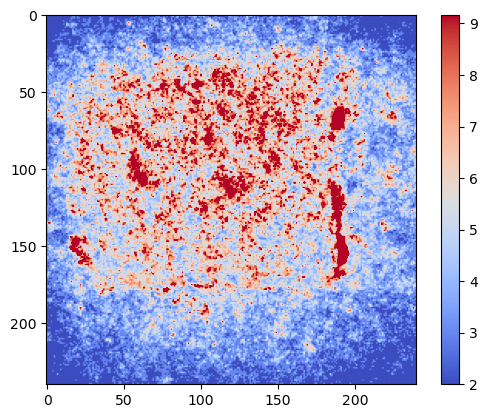

In [8]:
vmin = np.percentile(ff0, 5)
vmax = np.percentile(ff0, 95)
g = plt.imshow(ff0, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.colorbar(g)

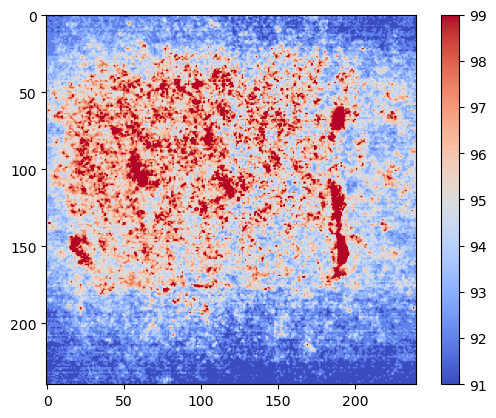

In [9]:
vmin = np.percentile(bx, 5)
vmax = np.percentile(bx, 95)
g = plt.imshow(bx, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.colorbar(g)

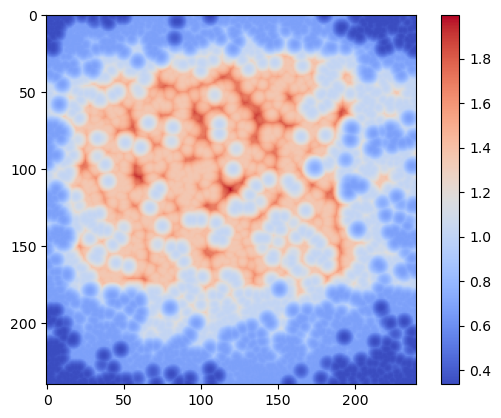

In [10]:
bg = restoration.rolling_ball(ff0, radius=20)
ff = bg / np.mean(bg)
g = plt.imshow(ff, cmap='coolwarm')
plt.colorbar(g)

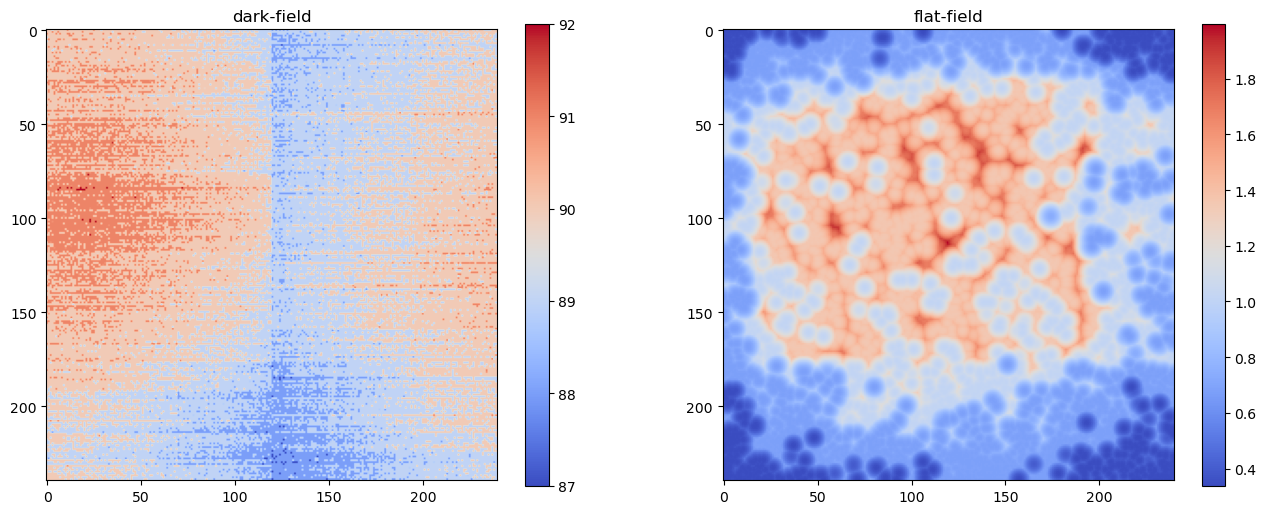

In [11]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(dx, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [12]:
import tifffile
outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/lt172_r1c0_flatfield'
!mkdir -p $outdir

tifffile.imwrite(outdir+'/darkfield_rb.tiff', dx)
tifffile.imwrite(outdir+'/brightfield_rb.tiff', bx)
tifffile.imwrite(outdir+'/flatfield_rb.tiff', ff)

In [13]:
!ls $outdir
dx = tifffile.imread(outdir+'/darkfield_rb.tiff')
ff = tifffile.imread(outdir+'/flatfield_rb.tiff')
dx, ff

brightfield_rb.tiff  darkfield_rb.tiff	flatfield_rb.tiff


(array([[90.  , 90.  , 90.  , ..., 90.  , 89.83, 90.  ],
        [90.  , 90.  , 90.  , ..., 90.  , 90.  , 90.  ],
        [91.  , 90.  , 90.  , ..., 90.  , 90.  , 89.  ],
        ...,
        [90.  , 90.  , 90.  , ..., 89.  , 89.  , 89.  ],
        [90.  , 90.  , 90.  , ..., 89.83, 90.  , 89.  ],
        [90.  , 90.  , 90.  , ..., 90.  , 89.  , 89.  ]]),
 array([[0.35491694, 0.34645115, 0.33799597, ..., 0.37188049, 0.34645115,
         0.33799597],
        [0.34645115, 0.33799597, 0.33799597, ..., 0.35491694, 0.34645115,
         0.34645115],
        [0.33799597, 0.34645115, 0.34645115, ..., 0.34645115, 0.33799597,
         0.34645115],
        ...,
        [0.33799597, 0.33799597, 0.33799597, ..., 0.34645115, 0.34645115,
         0.34645115],
        [0.33799597, 0.33799597, 0.33799597, ..., 0.33799597, 0.33799597,
         0.34645115],
        [0.33799597, 0.33799597, 0.33799597, ..., 0.33799597, 0.34645115,
         0.35491694]]))